In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hotel-reservations-classification-dataset/Hotel Reservations.csv


In [3]:
res = pd.read_csv('/kaggle/input/hotel-reservations-classification-dataset/Hotel Reservations.csv', parse_dates=['arrival_date'])

In [3]:
res.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [5]:
res.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [116]:
res['booking_status'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Not_Canceled    67.2%
Canceled        32.8%
Name: booking_status, dtype: object

In [4]:
res.columns = res.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(res.dtypes[res.dtypes == 'object'].index)

for c in categorical_columns:
    res[c] = res[c].str.lower().str.replace(' ', '_')

In [10]:
res.head()

,booking_id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,inn00001,2,0,1,2,meal_plan_1,0,room_type_1,224,2017,10,2,offline,0,0,0,65.00,0,not_canceled
1,inn00002,2,0,2,3,not_selected,0,room_type_1,5,2018,11,6,online,0,0,0,106.68,1,not_canceled
2,inn00003,1,0,2,1,meal_plan_1,0,room_type_1,1,2018,2,28,online,0,0,0,60.00,0,canceled
3,inn00004,2,0,0,2,meal_plan_1,0,room_type_1,211,2018,5,20,online,0,0,0,100.00,0,canceled
4,inn00005,2,0,1,1,not_selected,0,room_type_1,48,2018,4,11,online,0,0,0,94.50,0,canceled


In [5]:
res['booking_status'] = (res['booking_status'] == 'canceled').astype(int)

In [9]:
res.head()

,booking_id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,inn00001,2,0,1,2,meal_plan_1,0,room_type_1,224,2017,10,2,offline,0,0,0,65.00,0,0
1,inn00002,2,0,2,3,not_selected,0,room_type_1,5,2018,11,6,online,0,0,0,106.68,1,0
2,inn00003,1,0,2,1,meal_plan_1,0,room_type_1,1,2018,2,28,online,0,0,0,60.00,0,1
3,inn00004,2,0,0,2,meal_plan_1,0,room_type_1,211,2018,5,20,online,0,0,0,100.00,0,1
4,inn00005,2,0,1,1,not_selected,0,room_type_1,48,2018,4,11,online,0,0,0,94.50,0,1


In [119]:
res['booking_status'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

0    67.2%
1    32.8%
Name: booking_status, dtype: object

In [6]:
res['arrival_date'] = pd.to_numeric(res['arrival_date'], errors='coerce')

In [7]:
categorical= ['type_of_meal_plan','room_type_reserved','market_segment_type']

In [8]:
numerical = ['no_of_children',
 'lead_time',
 'required_car_parking_space',
 'no_of_previous_cancellations',
 'no_of_adults',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'no_of_special_requests',
 'repeated_guest',
 'avg_price_per_room',
'booking_status']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
df_train, df_test = train_test_split(res, test_size=0.2, random_state=42,shuffle = True)

In [16]:
len(df_train),len(df_test)

(29020, 7255)

In [17]:
global_churn = df_train.booking_status.mean()
global_churn

0.3262922122674018

In [11]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [19]:
for c in categorical:
    print(c)
    df_group = df_train.groupby(c).booking_status.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()

type_of_meal_plan


,mean,count,diff,risk
type_of_meal_plan,,,,
meal_plan_1,0.309868,22274,-0.016424,0.949664
meal_plan_2,0.459917,2657,0.133625,1.409526
meal_plan_3,0.250000,4,-0.076292,0.766184
not_selected,0.329009,4085,0.002716,1.008325




room_type_reserved


,mean,count,diff,risk
room_type_reserved,,,,
room_type_1,0.321179,22489,-0.005113,0.984330
room_type_2,0.324515,567,-0.001777,0.994553
room_type_3,0.200000,5,-0.126292,0.612948
room_type_4,0.339806,4841,0.013514,1.041416
room_type_5,0.294393,214,-0.031900,0.902236
room_type_6,0.415265,773,0.088973,1.272679
room_type_7,0.244275,131,-0.082017,0.748638




market_segment_type


,mean,count,diff,risk
market_segment_type,,,,
aviation,0.270833,96,-0.055459,0.830033
complementary,0.000000,312,-0.326292,0.000000
corporate,0.109681,1632,-0.216611,0.336145
offline,0.298458,8430,-0.027834,0.914695
online,0.363774,18550,0.037481,1.114871


In [20]:
from sklearn.metrics import mutual_info_score

In [21]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_train.booking_status)

In [22]:
mi = df_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

market_segment_type    0.014029
type_of_meal_plan      0.004002
room_type_reserved     0.000673
dtype: float64

In [23]:
from sklearn.feature_selection import mutual_info_classif

df_train[numerical].apply(mutual_info_churn_score)

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


no_of_children                  0.000616
lead_time                       0.136865
required_car_parking_space      0.005083
no_of_previous_cancellations    0.002886
no_of_adults                    0.005223
no_of_weekend_nights            0.002608
no_of_week_nights               0.005924
no_of_special_requests          0.038402
repeated_guest                  0.008510
avg_price_per_room              0.164747
booking_status                  0.631522
dtype: float64

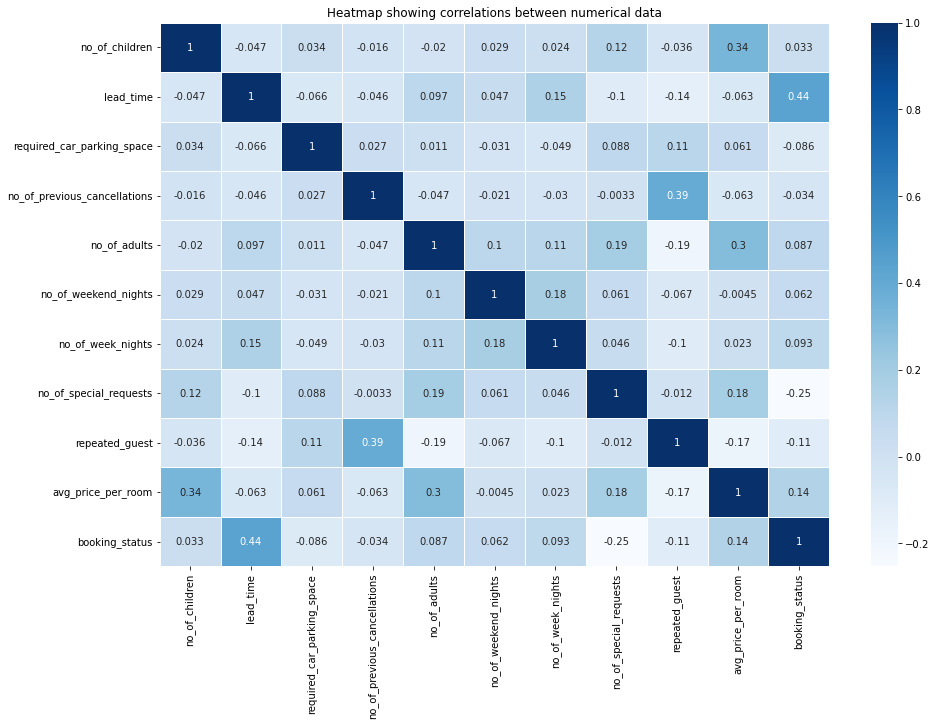

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))  
sns.heatmap(res[numerical].corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [12]:
y_train = df_train.booking_status.values
y_test = df_test.booking_status.values
del df_train['booking_status']
del df_test['booking_status']

In [127]:
cat= ['type_of_meal_plan','room_type_reserved','market_segment_type']
num = ['no_of_children',
 'lead_time',
 'required_car_parking_space',
 'no_of_previous_cancellations',
 'no_of_adults',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'no_of_special_requests',
 'repeated_guest',
 'avg_price_per_room']

In [18]:
from sklearn.feature_extraction import DictVectorizer

In [69]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[cat + num].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

test_dict = df_test[cat + num].to_dict(orient='records')
X_test = dv.transform(test_dict)

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [72]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

#Logistic Regression Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.8030323914541695
Precision Score : 0.7521716913643332
Recall Score : 0.609271523178808
F1 Score : 0.6732220443631375
Confusion Matrix : 
[[4354  485]
 [ 944 1472]]


In [73]:
from sklearn.preprocessing import  StandardScaler, RobustScaler, MinMaxScaler

sc_x =MinMaxScaler()
X_train_sc = sc_x.fit_transform(X_train)
X_test_sc = sc_x.transform(X_test)

model = LogisticRegression(solver='liblinear')
model.fit(X_train_sc, y_train)
y_pred_sc = model.predict(X_test_sc)

In [74]:
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_sc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_sc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_sc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_sc)))

#Logistic Regression Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred_sc)))

Accuracy Score : 0.8033080634045486
Precision Score : 0.7547655847501288
Recall Score : 0.6063741721854304
F1 Score : 0.6724810649529492
Confusion Matrix : 
[[4363  476]
 [ 951 1465]]


In [34]:
from sklearn.model_selection import GridSearchCV 

In [58]:
clf = LogisticRegression(solver='liblinear',max_iter = 2000)
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'recall')
grid_clf_acc.fit(X_train_sc, y_train)

y_pred_acc = grid_clf_acc.predict(X_test_sc)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

confusion_matrix(y_test,y_pred_acc)

Accuracy Score : 0.8034458993797381
Precision Score : 0.7525510204081632
Recall Score : 0.6105132450331126
F1 Score : 0.6741316270566727


array([[4354,  485],
       [ 941, 1475]])

In [54]:
grid_clf_acc.best_params_
grid_clf_acc.best_estimator_

LogisticRegression(C=25, max_iter=2000, penalty='l1', solver='liblinear')

In [36]:
features = cat + num
features

['type_of_meal_plan',
 'room_type_reserved',
 'market_segment_type',
 'no_of_children',
 'lead_time',
 'required_car_parking_space',
 'no_of_previous_cancellations',
 'no_of_adults',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'no_of_special_requests',
 'repeated_guest',
 'avg_price_per_room']

In [61]:
orig_score = recall_score(y_test,y_pred_acc)

for c in features:
    subset = features.copy()
    subset.remove(c)
    
    train_dict = df_train[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)

    model = LogisticRegression(C=25, max_iter=2000, penalty='l1', solver='liblinear')
    model.fit(X_train_sc, y_train)

    test_dict = df_test[subset].to_dict(orient='records')
    X_test = dv.transform(test_dict)

    y_pred = model.predict(X_test_sc)

    score = precision_score(y_test,y_pred)
    print(c, orig_score - score, score)

type_of_meal_plan 0.0 0.7525510204081632
room_type_reserved 0.0 0.7525510204081632
market_segment_type 0.0 0.7525510204081632
no_of_children 0.0 0.7525510204081632
lead_time -0.0003841505974518933 0.7529351710056151
required_car_parking_space 0.00012631392526385454 0.7524247064828994
no_of_previous_cancellations 0.0 0.7525510204081632
no_of_adults 0.0 0.7525510204081632
no_of_weekend_nights 0.00012631392526385454 0.7524247064828994
no_of_week_nights 0.0 0.7525510204081632
no_of_special_requests 0.0 0.7525510204081632
repeated_guest 0.0 0.7525510204081632
avg_price_per_room 0.0 0.7525510204081632


In [94]:
cat= ['type_of_meal_plan','room_type_reserved','market_segment_type']
num = ['no_of_children',
 'lead_time',

 
 'no_of_adults',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'no_of_special_requests',
 'repeated_guest',
 'avg_price_per_room']

In [95]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[cat + num].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

test_dict = df_test[cat + num].to_dict(orient='records')
X_test = dv.transform(test_dict)

In [96]:
sc_x =MinMaxScaler()
X_train_sc = sc_x.fit_transform(X_train)
X_test_sc = sc_x.transform(X_test)

model = LogisticRegression(C=25, max_iter=2000, penalty='l1', solver='liblinear')
model.fit(X_train_sc, y_train)
y_pred_acc = model.predict(X_test_sc)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

confusion_matrix(y_test,y_pred_acc)

Accuracy Score : 0.8038594073053067
Precision Score : 0.7537046499744506
Recall Score : 0.6105132450331126
F1 Score : 0.6745941001600732


array([[4357,  482],
       [ 941, 1475]])

In [13]:
from sklearn.svm import SVC

In [38]:
model = SVC(C= 1, gamma= 0.01, kernel= 'rbf', random_state=42)

In [39]:
cat= ['type_of_meal_plan','room_type_reserved','market_segment_type']
num = ['no_of_children',
 'lead_time',
 'required_car_parking_space',
 'no_of_previous_cancellations',
 'no_of_adults',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'no_of_special_requests',
 'repeated_guest',
 'avg_price_per_room']

In [40]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[cat + num].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

test_dict = df_test[cat + num].to_dict(orient='records')
X_test = dv.transform(test_dict)

In [41]:
model.fit(X_train,y_train)

SVC(C=1, gamma=0.01, random_state=42)

In [42]:
y_pred = model.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

#SVM Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.8095106822880772
Precision Score : 0.8469798657718121
Recall Score : 0.5223509933774835
F1 Score : 0.6461853558627753
Confusion Matrix : 
[[4611  228]
 [1154 1262]]


In [51]:
sc_x =StandardScaler()
X_train_sc = sc_x.fit_transform(X_train)
X_test_sc = sc_x.transform(X_test)
model.fit(X_train_sc,y_train)
y_pred = model.predict(X_test_sc)

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

#SVM Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.8187456926257753
Precision Score : 0.8
Recall Score : 0.6076158940397351
F1 Score : 0.6906610209362504
Confusion Matrix : 
[[4472  367]
 [ 948 1468]]


In [43]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [44]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3,scoring = 'recall')

In [45]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.186 total time= 1.4min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.194 total time= 1.4min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.187 total time= 1.4min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.201 total time= 1.4min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.180 total time= 1.4min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.269 total time=  59.8s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.274 total time= 1.0min
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.276 total time=  59.8s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.280 total time= 1.0min
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.278 total time= 1.1min
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.407 total time=  31.3s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='recall', verbose=3)

In [46]:
grid.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [47]:
grid.best_estimator_

SVC(C=1000, gamma=0.01)

In [48]:
grid_predictions = grid.predict(X_test)

In [49]:
print('Accuracy Score : ' + str(accuracy_score(y_test,grid_predictions)))
print('Precision Score : ' + str(precision_score(y_test,grid_predictions)))
print('Recall Score : ' + str(recall_score(y_test,grid_predictions)))
print('F1 Score : ' + str(f1_score(y_test,grid_predictions)))

#SVM Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,grid_predictions)))

Accuracy Score : 0.8476912474155754
Precision Score : 0.7785805354866129
Recall Score : 0.7582781456953642
F1 Score : 0.7682952400922626
Confusion Matrix : 
[[4318  521]
 [ 584 1832]]


In [14]:
model = SVC(C= 1000, gamma= 0.01, kernel= 'rbf', random_state=42)

In [15]:
cat= ['type_of_meal_plan','room_type_reserved','market_segment_type']
num = ['no_of_children',
 'lead_time',

 'no_of_previous_cancellations',
 'no_of_adults',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'no_of_special_requests',
 'repeated_guest',
 'avg_price_per_room']

In [19]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[cat + num].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

test_dict = df_test[cat + num].to_dict(orient='records')
X_test = dv.transform(test_dict)

In [109]:
sc_x =StandardScaler()
X_train_sc = sc_x.fit_transform(X_train)
X_test_sc = sc_x.transform(X_test)

In [20]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

#SVM Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.8463128876636802
Precision Score : 0.7773987206823028
Recall Score : 0.7545529801324503
F1 Score : 0.7658055030455786
Confusion Matrix : 
[[4317  522]
 [ 593 1823]]
